# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/Users/ignaciolorenzoqueralt/Documents/Ironhack/labs/lab-customer-analysis-round-2-main/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [5]:
df.columns = df.columns.str.lower()
    
    #replace space with _
df_columns = []
for col in df.columns:
    col_ = col.replace(' ', '_')
    df_columns.append(col_)
df.columns = df_columns
    
    # 5 Check and deal with NaN values.
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
1,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
2,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
3,13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
4,16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
4539,10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
4540,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
4541,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [6]:
df.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [7]:
numerical = df.select_dtypes(include='number')
numerical

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
1,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
2,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
3,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000
4,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...,...
4538,10902,3579.023825,28304,91,10.0,30,2.0,1,655.200000
4539,10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
4540,10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
4541,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929


In [8]:
categoricals = df.select_dtypes('object')
categoricals

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
1,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
2,HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
3,KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
4,FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
4539,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
4540,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A
4541,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A


### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


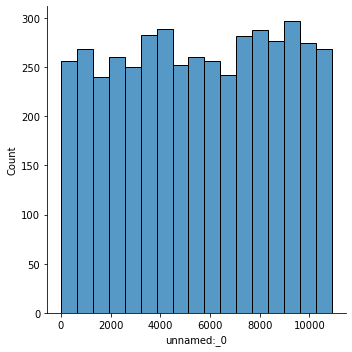

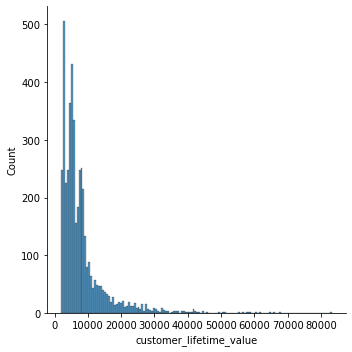

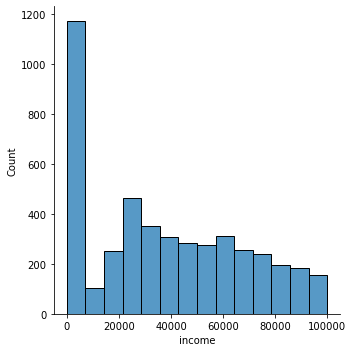

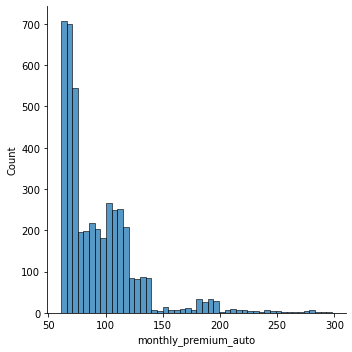

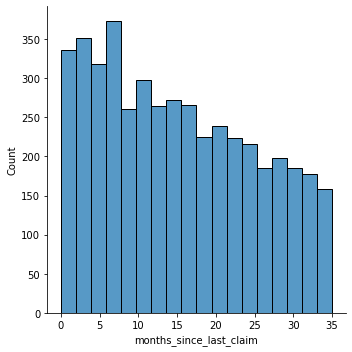

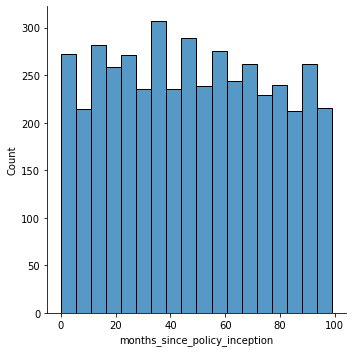

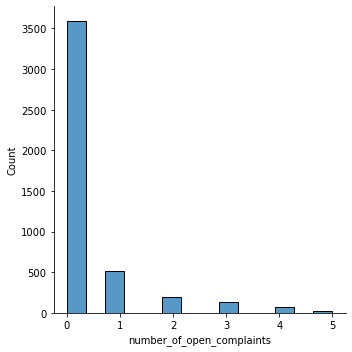

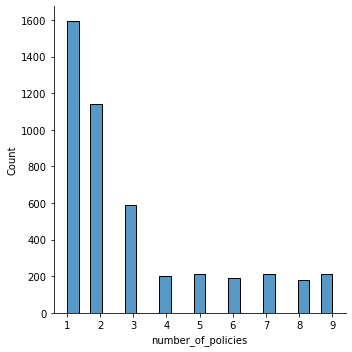

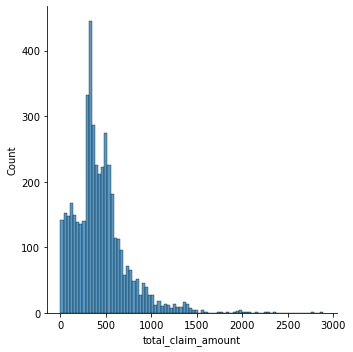

In [16]:
# Use seaborn library to construct distribution plots for the numerical variables
for column in numerical.columns:
    sns.displot(numerical[column])

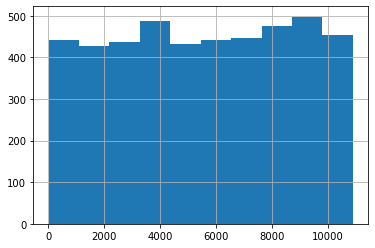

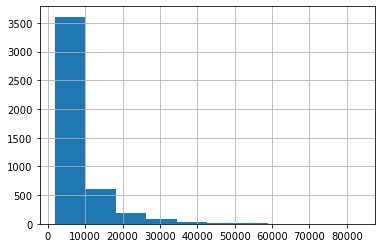

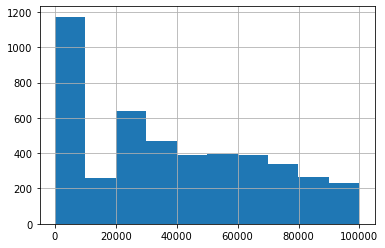

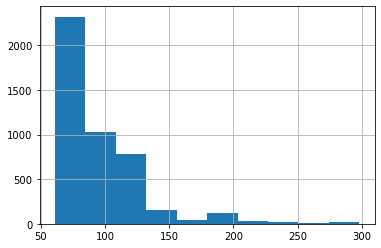

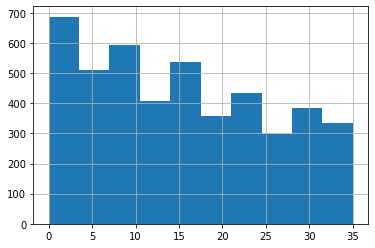

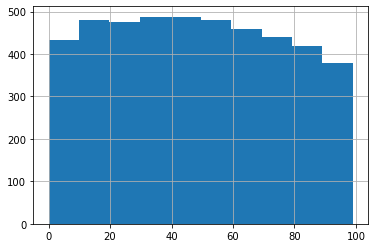

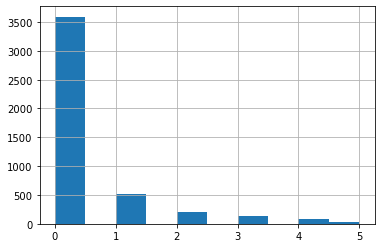

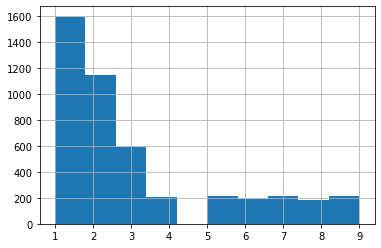

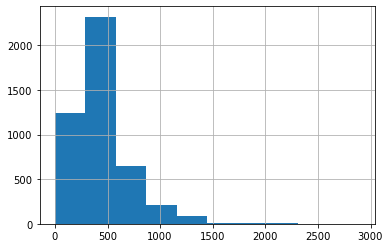

In [10]:
# Use Matplotlib to construct histograms
for column in numerical.columns:
    plt.figure()
    numerical[column].hist()

In [11]:
# Do the distributions for different numerical variables look like a normal distribution?

    # No, none of the columns follows a strict normal distribution or even a close approximation to it.

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [14]:
X = numerical.drop(['total_claim_amount'], axis=1)
y = numerical['total_claim_amount']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     619.7
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:04:58   Log-Likelihood:                -30604.
No. Observations:                4543   AIC:                         6.123e+04
Df Residuals:                    4534   BIC:                         6.128e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='total_claim_amount'>

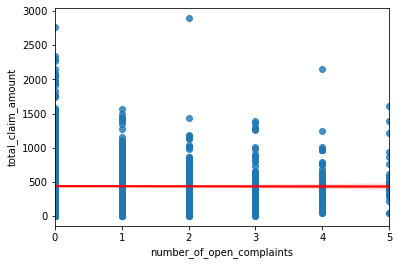

In [18]:
# none of the p-values is greater than 0.9 hence we shall not delete any feature.